<div class="markdown-google-sans">

# <strong>Introduction</strong>
</div>

As the team of <strong>Number Ninjas</strong>, we have decided to participate in a challenging data science competition, which is performing by Metu Stats Club. This competition, also known as a Datathon, is not only an opportunity for us to improve ourselves in the data science field but also a chance to meet the professionals in this field to get, thank you in advance <strong>Metu Statistics and Data Science Club</strong> for this organization.

##<strong>Team</strong>
We are Number Ninjas - a team of three highly motivated and skilled individuals eager to take part in this datathon. Our team consists of three students from Middle East Technical University (METU), one from the Statistics department in their 3rd year and the other from the Mathematics department in their 4th year. Together with our combined knowledge and expertise in statistics and mathematics, we are confident in our ability to analyze and make sense of complex datasets. We are excited to participate in this datathon and are committed to delivering top-quality results.

##<strong>Members</strong>


*   Ali Valiyev
*   Ahmet Alpay Çetin
*   Hüseyin Eren Demirtaş



## <strong>Colab</strong>
For this competition, we will be using <strong>Google Colab</strong>, a powerful online platform that allows us to write and execute Python code, collaborate with our team members, and share our work with you. It's an excellent tool for working with data and implementing various data science techniques.

<div class="markdown-google-sans">

# <strong>Datathon Task</strong>
</div>

## <strong>Context</strong>
"PRIZY" is a "cheese" company founded in the 1970s. Its main brand, "Prizy X", has been a popular brand for many years. In 1975, its second brand, "Prizy Y", joined the company through a merger. Although the newly added Prizy Y brand is also growing rapidly, it cannot reach the level of the first brand. Both brands are consumed by the same target audience, equally appreciated by consumers, have the same distribution, and are placed side by side on retailer shelves.

## <strong>Purpose</strong>
The goal of this project is to use machine learning algorithms to identify possible reasons for the low market share of the "Prizy-Y" brand and to generate recommendations that could accelerate the brand's growth.  

1. Identify the successful factors of an advertisement that performs well.

2. Propose a sustainable market share increase strategy for "Prizy Y" and predict its sales until 2028.

3.	Find the most important factors that affect a brand's market share in the given categories.

4. Find the most important factors for an advertisement that is easy to notice and remember.

Create a roadmap to success for the Prizy-Y brand using various data processing, analysis, and machine learning methods, and explain your results.

<div class="markdown-google-sans">

# <strong>Import Data</strong>

</div>

In order to import the provided data set into our colab environment, we will first save the data into <strong>Google Drive</strong>, and then from there import it here. Because saving the provided dataset into Google Drive and then importing it into colab has several advantages, for instance

* It ensures that the data is securely stored and easily accessible.

* It allows multiple team members to access and work on the same dataset simultaneously.

* It reduces the time and effort required to upload the data into Google Colab each time you want to work on the dataset.

Then by using <strong>pandas</strong> library, we will read the data and save it into suitable varaibles.

## <strong>Download</strong>
For this purpose, first we will share the data in the drive, that everyone has access. Then by using main link id of the file to share, we will import the data as follows,

In [ ]:
! gdown 1Hl1wGiBLQicpRZSYpsKHI29STWxhGWZx

Downloading...
From: https://drive.google.com/uc?id=1Hl1wGiBLQicpRZSYpsKHI29STWxhGWZx
To: /content/data.xlsx
100% 539k/539k [00:00<00:00, 149MB/s]


## <strong>Load</strong>
Now, let us read the provided data. Since it has 2 seperates sheets, we will define 2 different varaible for each of them. To read them we will use from "pandas" library the "read_excel" function.

In [ ]:
import pandas as pd
import numpy as np
file_name = "data.xlsx"
behavior_sheet = "Alım Davranışı Takip"
ad_sheet = "Reklam Test Araştırması"
behavior_df = pd.read_excel(io=file_name, sheet_name=behavior_sheet)
ad_df = pd.read_excel(io=file_name, sheet_name=ad_sheet)

# Preprocessing

Preprocessing is an essential step in machine learning projects that involves transforming raw data into a format that is suitable for machine learning algorithms. Preprocessing involves several tasks, such as data cleaning, data transformation, and feature selection, which help to improve the performance of machine learning models.

In the context of our project, preprocessing may involve tasks such as:

1. Data cleaning: This involves identifying and handling missing or invalid data, and removing duplicate records.

2. Data transformation: This involves converting categorical variables into numerical variables, scaling numerical variables to a common range, and reducing the dimensionality of the data by selecting relevant features.

3. Feature selection: This involves selecting the most relevant features that have a significant impact on the outcome of the model and removing irrelevant features.

Preprocessing is crucial because it helps to improve the performance of machine learning models by reducing the noise in the data and ensuring that the data is in a suitable format for machine learning algorithms. By applying appropriate preprocessing techniques, you can improve the accuracy and efficiency of your models, as well as reduce overfitting and underfitting issues.

##Advertisement Test Research
Firstly, let us apply data cleaning and preprocessing over the advertisement test research part of the data set.

### <strong>Data Cleaning</strong>
The first thing that we have realized is that the provided data set has some missing values. However, these empty cells are indicated in different ways. For instance, some of them are marked as "XXX" with some strings others are left as just empty. To match these empty cells into one single form, we will convert all these entries into just the `NaN` value defined in the `numpy` class.

In [ ]:
empty_cells = ["XXX", "xxx", "xxxx", "xxxxx", "null"]
ad_df.replace(empty_cells, np.nan, inplace=True)

Then, we would like to drop all the columns having more than **40** `NaN` values. Because the total number of records we have in the data set is approximately **150**, trying to fill such column `NaN` values will change the data set information dramatically.

In [ ]:
thresh = 40
ad_df.dropna(thresh=ad_df.shape[0]-thresh, axis=1, inplace=True)

Now, we would like to fill in the rest of the missing entries by using the method of interpolation. In order to handle this, we first separate the data into numerical and categorical features.

In [ ]:
ad_df_numeric = ad_df.select_dtypes(include=["float64", "int64"])
ad_df_categoric = ad_df.select_dtypes(include=["object"])

For numerical features, we will apply the interpolation method to fill in the missing values for each column. We need to decide which type of interpolation method to use based on the distribution of the data. For example, if the data is linear, linear interpolation can be used. If the data is non-linear, spline or polynomial interpolation can be used.

In our case, it will be more suitable to use linear interpolation, because the provided index of the data does not support spline methods.

In [ ]:
ad_df_numeric = ad_df_numeric.interpolate(method="linear", axis=1)
ad_df_numeric = ad_df_numeric.round(1)

Now, let us convert the categorical values in the data set into integers, so that we can apply the algorithms later on. However, we need to be carefull with label encoding process. For each column we need to have uniqe encoder, so that we can apply inverse operation.

In [ ]:
from sklearn import preprocessing
encoders = {}
for column in ad_df_categoric.columns:
  le = preprocessing.LabelEncoder()
  ad_df_categoric[column] = le.fit_transform(ad_df_categoric[column])
  encoders[column] = le

Finally, let us merge the data with categorical ones. In the end, we will have only **3** records with `NaN` values. We will just drop them and finally obtain cleared data.

In [ ]:
ad_df = pd.merge(ad_df_categoric, ad_df_numeric, right_index=True, left_index=True)
ad_df = ad_df.dropna(axis=0)
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 154
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Product status                   153 non-null    int64  
 1   Ad format                        153 non-null    int64  
 2   RECALL POTENTIAL INDEX           153 non-null    float64
 3   VISIBILITY INDEX                 153 non-null    float64
 4   BRAND LINKAGE INDEX              153 non-null    float64
 5   Ad length (TV, Radio)            153 non-null    float64
 6   Likeability Top                  153 non-null    float64
 7   Likeability Top2                 153 non-null    float64
 8   Likeability Bottom               153 non-null    float64
 9   Is believable Top                153 non-null    float64
 10  Is believable Top2               153 non-null    float64
 11  Think new way Top                153 non-null    float64
 12  Think new way Top2    

### <strong>Data Spliting</strong>
When we have analyzed the data set, we have seen that the da set was actually constructed with 2 different measurements, **Top** and **Top2**. So, it will be more reasonable to first split data into 2 parts with respect to these two measures and analyze them separately.

In [ ]:
top_1 = "Top"
top_2 = "Top2"

top_1_columns = []
top_2_columns = []

for column in ad_df.columns:
  if top_2 not in column:
      if top_1 not in column:
        top_1_columns.append(column)
        top_2_columns.append(column)
      else:
        top_1_columns.append(column)
  else:
    top_2_columns.append(column)

ad_df_top_1 = ad_df[top_1_columns]
ad_df_top_2 = ad_df[top_2_columns]

### <strong>Save Data</strong>
Finally, let us save the obtained two data sets so that we will be able to use them in different programming languages, for instance, R. We will construct our main model in R because it provides an immense amount of options with the ability to display them more fast and efficient rather than Python.

In [ ]:
ad_df_top_1.to_csv("top_1.csv", index=False, encoding='utf-8-sig')
ad_df_top_2.to_csv("top_2.csv", index=False, encoding='utf-8-sig')

### <strong>Feature Selection</strong>
Feature selection is the process of selecting the most relevant features or variables from a dataset for a particular predictive modeling problem. In our project, feature selection is important because it allows us to focus on the most important variables that have a strong correlation with the target variable ad, rather than using all available features in our model.

#### <strong>Correlation</strong>
One way to perform feature selection is by using correlation maps. A correlation map is a visual representation of the correlation between different variables in a dataset. It helps us to identify which variables have a strong correlation with the target variable and are therefore important for our model.

Also, with the correlation we will be able to determine which metrices are corrolated with our target metric. To do that so, we first need to calculate the correlation between each variable in our dataset and the target variable. We can then visualize this correlation using a heatmap or other type of visualization. From this visualization, we can identify which variables have a strong positive or negative correlation with the target variable and are therefore important for our model.

In [ ]:
# Define a function to select correleted groups.
def get_corr_features(data_frame: pd.DataFrame, threshold: float = 0.80, min_count: int = 8):
  # Select only the numeric columns.
  numeric_cols = data_frame.select_dtypes(include=["float64", "int64"])

  # Create a correlation matrix.
  corr_matrix = numeric_cols.corr().abs()

  # Find index of features with high correlation.
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
  corr_cols = [column for column in upper.columns if any(upper[column] > threshold)]

  # Create a dictionary to hold count of correlated metrics for each feature.
  corr_count = {}
  for col in corr_cols:
      count = 0
      for c in corr_cols:
          if corr_matrix.loc[col, c] >= threshold:
              count += 1
      corr_count[col] = count

  for key, value in corr_count.copy().items():
    if value < min_count:
      del corr_count[key]

  corr_keys = list(corr_count.keys())
  return corr_keys

# Use the newly defined function to select features.
corr_keys_top_1 = get_corr_features(data_frame=ad_df_top_1, min_count=8)
corr_keys_top_2 = get_corr_features(ad_df_top_2, min_count=4)

# Define selected data frames.
ad_df_top_1_fs = ad_df_top_1[corr_keys_top_1 + ["Notice & remember Top"]]
ad_df_top_2_fs = ad_df_top_2[corr_keys_top_2 + ["Notice & remember Top2"]]

# Print the selected features.
print("-----Selected Features -------")
print("--Top 1--")
print("Features: ", corr_keys_top_1, "\nTotal Number of Features: ", len(corr_keys_top_1))
print("--Top 2--")
print("Features: ", corr_keys_top_2, "\nTotal Number of Features: ", len(corr_keys_top_2))

-----Selected Features -------
--Top 1--
Features:  ['Is believable Top', 'Think new way Top', 'Makes me feel good about x Top', 'Like to see on TV Top', 'For people like me Top', 'People will talk about Top', 'Fits with way Top', 'Stirred my emotions Top'] 
Total Number of Features:  8
--Top 2--
Features:  ['Makes me feel good about x Top2', 'For people like me Top2', 'Brand Diff Top2', 'Fits with way Top2', 'Stirred my emotions Top2'] 
Total Number of Features:  5


##### <strong>Top 1 Heat Map</strong>
Let us visualize the correlation heat map, with mostly correlated features in the data set with **Top** tag by comparing its target feature **Notice & remember Top**. So that we will see that the ones with correlated each other are also correlated with the target metric.

In [ ]:
# Create a correlation matrix
corr_matrix = ad_df_top_1_fs.corr().abs()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
.style
.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
.highlight_null(color='#f1f1f1')  # Color NaNs grey
.format(precision=2))

,Is believable Top,Think new way Top,Makes me feel good about x Top,Like to see on TV Top,For people like me Top,People will talk about Top,Fits with way Top,Stirred my emotions Top,Notice & remember Top
Is believable Top,nan,nan,nan,nan,nan,nan,nan,nan,nan
Think new way Top,0.84,nan,nan,nan,nan,nan,nan,nan,nan
Makes me feel good about x Top,0.90,0.90,nan,nan,nan,nan,nan,nan,nan
Like to see on TV Top,0.82,0.81,0.86,nan,nan,nan,nan,nan,nan
For people like me Top,0.90,0.88,0.93,0.86,nan,nan,nan,nan,nan
People will talk about Top,0.82,0.85,0.84,0.84,0.86,nan,nan,nan,nan
Fits with way Top,0.89,0.85,0.94,0.87,0.92,0.84,nan,nan,nan
Stirred my emotions Top,0.83,0.83,0.86,0.92,0.91,0.84,0.87,nan,nan
Notice & remember Top,0.70,0.64,0.67,0.74,0.70,0.82,0.72,0.73,nan


##### <strong>Top 2 Heat Map</strong>
Now, let us visualize the correlation heat map, with mostly correlated features in the data set with **Top2** tag by comparing its target feature **Notice & remember Top2**. So that we will see that the ones with correlated each other are also correlated with the target metric.

In [ ]:
# Create a correlation matrix
corr_matrix = ad_df_top_2_fs.corr().abs()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
.style
.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
.highlight_null(color='#f1f1f1')  # Color NaNs grey
.format(precision=2))

,Makes me feel good about x Top2,For people like me Top2,Brand Diff Top2,Fits with way Top2,Stirred my emotions Top2,Notice & remember Top2
Makes me feel good about x Top2,nan,nan,nan,nan,nan,nan
For people like me Top2,0.90,nan,nan,nan,nan,nan
Brand Diff Top2,0.84,0.84,nan,nan,nan,nan
Fits with way Top2,0.89,0.84,0.81,nan,nan,nan
Stirred my emotions Top2,0.81,0.85,0.81,0.73,nan,nan
Notice & remember Top2,0.66,0.72,0.68,0.61,0.76,nan


After applying data cleaning and data preprocessing to the data, we are ready to construct our model. For this purpose, we will use the programing language R. The main methodology and construction step of the modeling will be given as follows:

Firstly we will perform a number of data analysis tasks related to regression modeling, including assessing the normality of the data, building and refining a linear regression model, and identifying influential data points that may have a large impact on the model.

Here is a general overview of what we are going to do:

* The first thing we will do is set up the plotting window to display four histograms at once, using the par function to divide the window into a 2x2 grid.

* Next, we are going to create histograms for eight variables in the dataset, using the hist function.

* Then, we are building a linear regression model ( called as `model1`) using all variables in the dataset, and then display a summary of the model using the summary function. The `car::vif` function is used to calculate variance inflation factors (VIF) for the model, which can indicate whether **multicollinearity** is present in the data.

* Then, we will just remove the two variables from the dataset that have high **VIF** scores, and build a new linear regression model (`model1`) with the remaining variables. The `ols_step_forward_p` function is then used to iteratively remove variables from the model based on their p-values until a final model is reached.

* After the previous part, we are displaying a summary of the final linear regression model (`model1`), and then creating two diagnostic plots of the model using the plot function.

* Next, we will apply the **Shapiro-Wilk** test (`shapiro.test`) to check for normality of the **Notice & remember Top** variable.

* Then, we will identify any influential data points in the model using the **DFFITS** statistic, and remove them from the dataset using the `[-]` operator.

* As a final step, we will just rebuild the linear regression model (`model1`) with the cleaned dataset, display a summary of the model, and create two diagnostic plots of the model using the plot function.

In the big picture, the code performs a variety of data cleaning, modeling, and diagnostic tasks to build a linear regression model and assess its validity. The code uses a number of R functions and packages, including lm for linear regression, ols_step_forward_p for stepwise regression, `car::vif` for **VIF** calculations and various plotting functions for visualizing the data and model diagnostics.

##Buying Behavior Tracking

###Data cleaning



In [ ]:
empty_cells = ["-"]
behavior_df = behavior_df.replace(empty_cells, np.nan)

In [ ]:
thresh = 17
behavior_df = behavior_df.dropna(thresh=behavior_df.shape[1]-thresh, axis=0)

In [ ]:
behavior_df_numeric = behavior_df.select_dtypes(include=["float64", "int64"])
behavior_df_categoric = behavior_df.select_dtypes(include=["object"])

In [ ]:
behavior_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1549
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2020 Ocak     1297 non-null   float64
 1   2020 Subat    1298 non-null   float64
 2   2020 Mart     1297 non-null   float64
 3   2020 Nisan    1291 non-null   float64
 4   2020 Mayıs    1295 non-null   float64
 5   2020 Haziran  1283 non-null   float64
 6   2020 Temmuz   1280 non-null   float64
 7   2020 Agustos  1295 non-null   float64
 8   2020 Eylul    1299 non-null   float64
 9   2020 Ekim     1304 non-null   float64
 10  2020 Kasım    1312 non-null   float64
 11  2020 Aralik   1308 non-null   float64
 12  2021 Ocak     1327 non-null   float64
 13  2021 Şubat    1330 non-null   float64
 14  2021 Mart     1325 non-null   float64
 15  2021 Nisan    1322 non-null   float64
 16  2021 Mayıs    1323 non-null   float64
 17  2021 Haziran  1323 non-null   float64
 18  2021 Temmuz   1321 non-null 

In [ ]:
behavior_df_numeric = behavior_df_numeric.interpolate(method="linear", axis=1)
behavior_df_numeric = behavior_df_numeric.fillna(method="pad", axis=0)
behavior_df_numeric = behavior_df_numeric.round(3)

In [ ]:
behavior_df = pd.merge(behavior_df_categoric, behavior_df_numeric, right_index=True, left_index=True)
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1549
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1333 non-null   object 
 1   Brand         1333 non-null   object 
 2   Kategori      1333 non-null   object 
 3   Metric Type   1333 non-null   object 
 4   Metric        1333 non-null   object 
 5   2020 Ocak     1333 non-null   float64
 6   2020 Subat    1333 non-null   float64
 7   2020 Mart     1333 non-null   float64
 8   2020 Nisan    1333 non-null   float64
 9   2020 Mayıs    1333 non-null   float64
 10  2020 Haziran  1333 non-null   float64
 11  2020 Temmuz   1333 non-null   float64
 12  2020 Agustos  1333 non-null   float64
 13  2020 Eylul    1333 non-null   float64
 14  2020 Ekim     1333 non-null   float64
 15  2020 Kasım    1333 non-null   float64
 16  2020 Aralik   1333 non-null   float64
 17  2021 Ocak     1333 non-null   float64
 18  2021 Şubat    1333 non-null 

In [ ]:
behavior_df_cat_1 = behavior_df[behavior_df["Kategori"] == 1]

In [ ]:
behavior_df_cat_1_numeric = behavior_df_cat_1.select_dtypes(include=["float64", "int64"])
behavior_df_cat_1_categoric = behavior_df_cat_1.select_dtypes(include=["object"])

In [ ]:
behavior_df_cat_1_categoric

,Company,Brand,Kategori,Metric Type,Metric
1,Prizy,Y,1,Brand,TOM
2,Prizy,Y,1,Brand,Spontaneous Awareness
3,Prizy,Y,1,Brand,Awareness
4,Prizy,Y,1,Brand,Consideration
6,Prizy,Y,1,Brand,Trial
...,...,...,...,...,...
374,ANZ,B,1,Behavior,PF (times)
375,ANZ,B,1,Behavior,TS (gr)
376,ANZ,B,1,Behavior,TV (tl)
377,ANZ,B,1,Behavior,Price (gr/tl)


In [ ]:
seasons = {
    "Ocak": "Winter",
    "Şubat": "Winter",
    "Subat": "Winter",
    "Mart": "Spring",
    "Nisan": "Spring",
    "Mayıs": "Spring",
    "Haziran": "Summer",
    "Temmuz": "Summer",
    "Agustos": "Summer",
    "Eylul": "Fall",
    "Eylül": "Fall",
    "Ekim": "Fall",
    "Kasım": "Fall",
    "Aralik": "Winter",
    "Aralık": "Winter"
}
dfs = {
    "Winter": None,
    "Fall": None,
    "Summer": None,
    "Spring": None
}
for column in behavior_df_cat_1_numeric:
  month = column.split(" ")[-1]
  if month in seasons:
    df = dfs[seasons[month]]
    if type(df) == type(None):
      dfs[seasons[month]] = behavior_df_cat_1_numeric[column]
    else:
      df = df.rename(seasons[month])
      df_temp = behavior_df_cat_1_numeric[column]
      df_temp = df_temp.rename(seasons[month])
      dfs[seasons[month]] = df.add(df_temp)
  else:
    print("Following Column not Matched as Month: ", month)

In [ ]:
behavior_df_cat_1 = behavior_df_cat_1_categoric
for season, df in dfs.items():
  behavior_df_cat_1[season] = df
behavior_df_cat_1

,Company,Brand,Kategori,Metric Type,Metric,Winter,Fall,Summer,Spring
1,Prizy,Y,1,Brand,TOM,92.000,86.000,91.000,107.000
2,Prizy,Y,1,Brand,Spontaneous Awareness,228.000,195.000,195.000,214.000
3,Prizy,Y,1,Brand,Awareness,823.000,806.000,813.000,818.000
4,Prizy,Y,1,Brand,Consideration,813.000,788.000,800.000,804.000
6,Prizy,Y,1,Brand,Trial,595.000,570.000,587.000,601.000
...,...,...,...,...,...,...,...,...,...
374,ANZ,B,1,Behavior,PF (times),10.030,9.800,9.880,10.160
375,ANZ,B,1,Behavior,TS (gr),859.557,914.281,852.873,842.463
376,ANZ,B,1,Behavior,TV (tl),139.409,156.664,122.901,122.633
377,ANZ,B,1,Behavior,Price (gr/tl),1.326,1.470,1.346,1.279


In [ ]:
brands = behavior_df_cat_1["Brand"].unique()
behavior_df_cat_1_t = pd.DataFrame()
for brand in brands:
  temp_df = behavior_df_cat_1[behavior_df_cat_1["Brand"] == brand].drop(columns=["Company", "Kategori", "Metric Type", "Brand"])
  temp_df = temp_df.set_index("Metric")
  temp_df = temp_df.transpose().reset_index().rename(columns={"index": "Season"})
  temp_df["Brand"] = brand
  behavior_df_cat_1_t = pd.concat([behavior_df_cat_1_t, temp_df], ignore_index=True)
behavior_df_cat_1_t = behavior_df_cat_1_t.reset_index(drop=True)
behavior_df_cat_1_t.interpolate(axis=0, inplace=True)

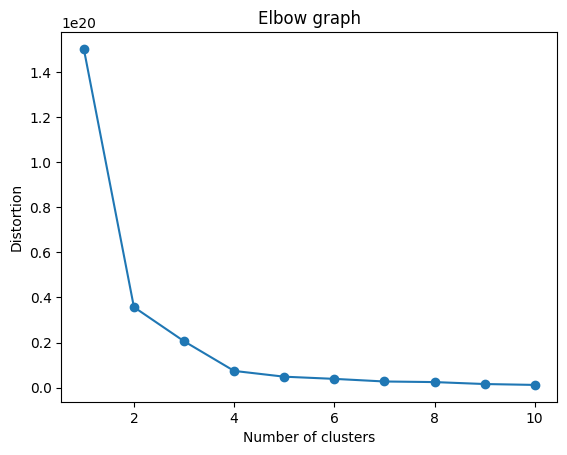

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

data = behavior_df_cat_1_t.set_index("Brand")
data["Season"] = label_encoder.fit_transform(data["Season"])

# calculate distortion for different values of k
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# plot the elbow graph
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow graph')
plt.show()

In [ ]:
# fit k-means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=4, n_init="auto")
y_kmeans = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# add cluster labels to the dataset
data['Cluster'] = y_kmeans
data["Season"] = label_encoder.inverse_transform(data["Season"])

In [ ]:
import copy
ranking = pd.DataFrame()
rows, columns = centers.shape
columns = data.columns.tolist()
for row, column in enumerate(columns[: len(columns)-1]):
  ranks = centers[:,row]
  ranks_sorted = copy.deepcopy(ranks).tolist()
  ranks_sorted.sort()
  ranks_sorted.reverse()
  the_index = list()
  for entry in ranks:
    the_index.append(ranks_sorted.index(entry) + 1)
  temp_df = pd.DataFrame(
      the_index,
      index = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]
  ).rename(columns={0: column})
  ranking = pd.concat([temp_df, ranking], axis=1)
ranking

,No of Sku (barcode),Price (gr/tl),TV (tl),TS (gr),PF (times),SPB (gr),QPB (gr),Value (tl),Volume (gr),REPEATER Rate,...,Yakınlık,Performance,Most Often,Repurchase,Trial,Consideration,Awareness,Spontaneous Awareness,TOM,Season
Cluster 0,1,4,3,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
Cluster 1,4,1,1,4,4,2,4,4,4,4,...,4,4,3,4,4,4,4,4,4,2
Cluster 2,3,3,2,1,3,3,2,3,3,3,...,3,3,4,3,3,3,3,3,3,1
Cluster 3,2,2,4,3,2,4,3,2,2,2,...,2,2,2,2,2,2,2,2,2,3


In [ ]:
print("Brands with cluster 0: ", set(data[data["Cluster"] == 0].index.tolist()))
print("Brands with cluster 1: ", set(data[data["Cluster"] == 1].index.tolist()))
print("Brands with cluster 2: ", set(data[data["Cluster"] == 2].index.tolist()))
print("Brands with cluster 3: ", set(data[data["Cluster"] == 3].index.tolist()))

Brands with cluster 0:  {'A', 'X'}
Brands with cluster 1:  {'A-ii', 'GH', 'X-ii', 'Beyaz', 'R', 'GT', 'Y-ii', 'A-i', 'Y', 'Y-i', 'B', 'X-i'}
Brands with cluster 2:  {'X-ii', 'KR', 'Mavi', 'CK', 'X', 'X-i', 'M'}
Brands with cluster 3:  {'A', 'X', 'M'}


In [ ]:
ranking_t = ranking.transpose()
ranking_t[ranking_t["Cluster 1"] == 1]

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Price (gr/tl),4,1,3,2
TV (tl),3,1,2,4


In [ ]:
data

Metric,Season,TOM,Spontaneous Awareness,Awareness,Consideration,Trial,Repurchase,Most Often,Performance,Yakınlık,...,Volume (gr),Value (tl),QPB (gr),SPB (gr),PF (times),TS (gr),TV (tl),Price (gr/tl),No of Sku (barcode),Cluster
Brand,,,,,,,,,,,,,,,,,,,,,
Y,Winter,92.000000,228.00,823.0,813.000000,595.000000,418.000000,202.000000,449.000000,468.000000,...,7.122532e+08,9.391291e+07,985.542,120.234,10.48,845.854,103.307,1.150,223.0,1
Y,Fall,86.000000,195.00,806.0,788.000000,570.000000,412.000000,184.000000,445.000000,458.000000,...,6.447076e+08,1.149594e+08,925.562,140.063,10.39,800.987,120.968,1.358,205.0,1
Y,Summer,91.000000,195.00,813.0,800.000000,587.000000,417.000000,184.000000,464.000000,466.000000,...,4.787271e+08,5.949866e+07,1028.115,121.069,10.57,873.786,102.803,1.105,197.0,1
Y,Spring,107.000000,214.00,818.0,804.000000,601.000000,425.000000,203.000000,470.000000,470.000000,...,7.110638e+08,8.603371e+07,1060.285,123.216,10.76,884.999,103.789,1.097,217.0,1
X-i,Winter,137.000000,270.00,625.0,803.000000,343.000000,219.000000,86.000000,469.538462,473.230769,...,9.010018e+08,7.891936e+07,1052.386,90.795,10.44,907.243,78.875,0.776,336.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-ii,Spring,6.777778,64.08,353.3,425.153846,151.923077,73.461538,8.538462,112.846154,110.076923,...,4.460321e+08,4.333019e+07,632.937,61.430,10.58,537.691,52.056,0.874,16.0,1
B,Winter,7.000000,78.00,440.0,407.000000,142.000000,69.000000,8.000000,107.000000,104.000000,...,1.082265e+08,1.566649e+07,959.396,155.322,10.03,859.557,139.409,1.326,99.0,1
B,Fall,2.000000,71.00,413.0,382.000000,138.000000,67.000000,10.000000,115.000000,107.000000,...,8.783370e+07,1.688201e+07,991.985,168.317,9.80,914.281,156.664,1.470,111.0,1


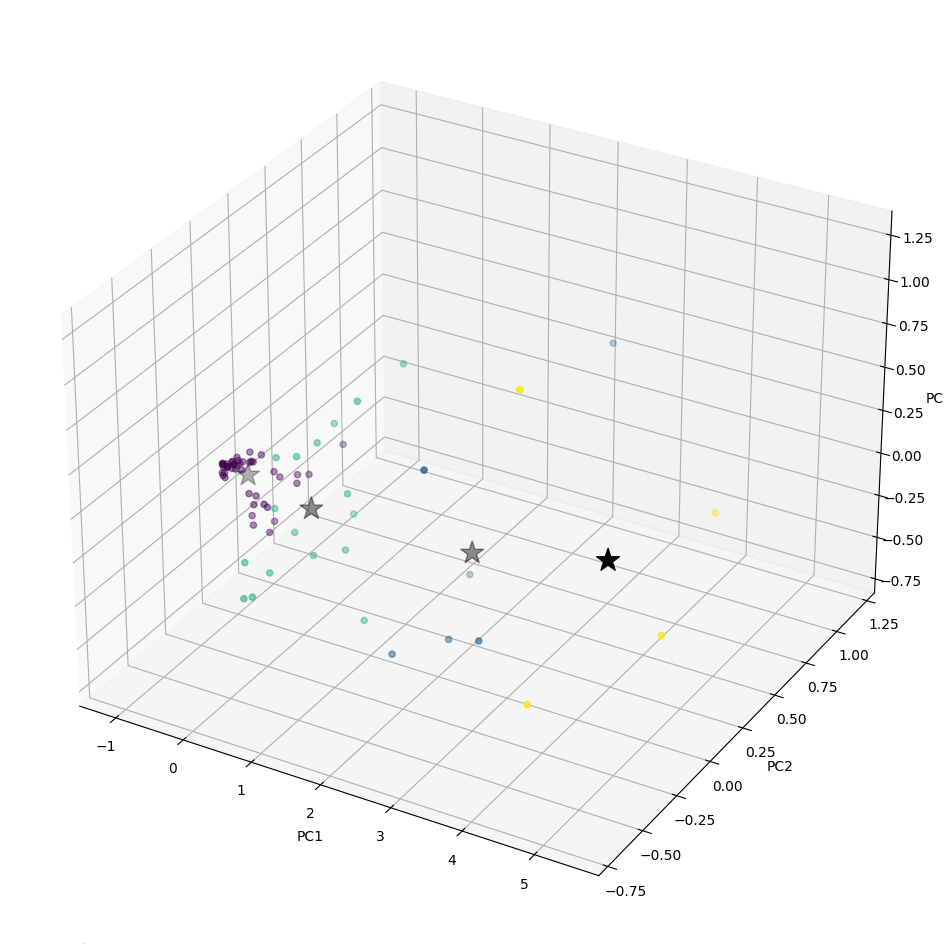

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

data_pca = behavior_df_cat_1_t.set_index("Brand")
data_pca["Season"] = label_encoder.fit_transform(data_pca["Season"])

# Perform PCA to reduce the dimensions of the data
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_pca)

# Perform K-means clustering
kmeans_pca = KMeans(n_clusters=4, n_init="auto")
kmeans_pca.fit(data_pca)
labels_pca = kmeans_pca.labels_
centers_pca = kmeans_pca.cluster_centers_

# Visualize the clusters in a 3D plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels_pca, cmap='viridis')
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], centers_pca[:, 2], marker='*', s=300, c='#050505')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Prediction till 2028

In [ ]:
pred_behavior_df = behavior_df[:21]
pred_behavior_df = pred_behavior_df.drop(pred_behavior_df.index[0], axis = 0)
brandsss = pred_behavior_df["Brand"].unique()
pred_behavior_df_t = pd.DataFrame()
for brandss in brandsss:
  temp1_df = pred_behavior_df[pred_behavior_df["Brand"] == brandss].drop(columns=["Company", "Kategori", "Metric Type", "Brand"])
  temp1_df = temp1_df.set_index("Metric")
  temp1_df = temp1_df.transpose().reset_index().rename(columns={"index": "Season"})
  temp1_df["Brand"] = brandss
  pred_behavior_df_t = pd.concat([pred_behavior_df_t, temp1_df], ignore_index=True)
pred_behavior_df_t = pred_behavior_df_t.reset_index(drop=True)
pred_behavior_df_t

Metric,Season,TOM,Spontaneous Awareness,Awareness,Consideration,Trial,Repurchase,Most Often,Performance,Yakınlık,...,Volume (gr),Value (tl),QPB (gr),SPB (gr),PF (times),TS (gr),TV (tl),Price (gr/tl),No of Sku (barcode),Brand
0,2020 Ocak,12.0,33.0,94.0,93.0,64.0,43.0,16.0,47.0,59.0,...,7.009549e+07,5.998067e+06,125.695,10.756,1.16,108.679,9.300,0.086,24.0,Y
1,2020 Subat,11.0,35.0,94.0,93.0,67.0,45.0,20.0,52.0,60.0,...,6.529180e+07,5.649864e+06,121.594,10.522,1.16,105.128,9.097,0.087,24.0,Y
2,2020 Mart,12.0,29.0,91.0,90.0,64.0,45.0,24.0,53.0,57.0,...,7.218653e+07,6.244631e+06,123.705,10.701,1.17,105.700,9.144,0.087,26.0,Y
3,2020 Nisan,13.0,25.0,92.0,90.0,68.0,49.0,22.0,57.0,57.0,...,7.380285e+07,6.399496e+06,137.211,11.898,1.25,110.004,9.539,0.087,22.0,Y
4,2020 Mayıs,11.0,23.0,93.0,93.0,69.0,48.0,22.0,60.0,60.0,...,6.921372e+07,6.272049e+06,140.962,12.774,1.21,116.360,10.544,0.091,25.0,Y
5,2020 Haziran,11.0,22.0,92.0,90.0,65.0,44.0,22.0,61.0,60.0,...,5.741854e+07,5.020643e+06,130.196,11.384,1.17,111.605,9.759,0.087,20.0,Y
6,2020 Temmuz,11.0,22.0,91.0,90.0,67.0,46.0,20.0,52.0,51.0,...,5.034918e+07,4.470967e+06,129.379,11.489,1.17,110.391,9.803,0.089,19.0,Y
7,2020 Agustos,12.0,25.0,93.0,92.0,66.0,48.0,19.0,42.0,43.0,...,3.897727e+07,3.473493e+06,120.620,10.749,1.15,104.544,9.316,0.089,19.0,Y
8,2020 Eylul,13.0,26.0,93.0,92.0,67.0,50.0,21.0,43.0,44.0,...,4.122055e+07,3.864951e+06,111.251,10.431,1.13,98.202,9.208,0.094,18.0,Y
9,2020 Ekim,10.0,19.0,91.0,89.0,66.0,49.0,22.0,50.0,51.0,...,4.917756e+07,4.741825e+06,111.814,10.781,1.16,96.360,9.291,0.096,21.0,Y


In [ ]:
months = {
  "Ocak": 1,
  "Şubat": 2,
  "Subat": 2,
  "Mart": 3,
  "Nisan": 4,
  "Mayıs": 5,
  "Haziran": 6,
  "Temmuz": 7,
  "Agustos": 8,
  "Eylul": 9,
  "Eylül": 9,
  "Ekim": 10,
  "Kasım": 11,
  "Aralik": 12,
  "Aralık": 12
}
new_dates = list()
for raw_date in pred_behavior_df_t['Season']:
  year = str(raw_date.split(" ")[0].strip())
  month = str(months[raw_date.split(" ")[1].strip()])
  day = str(0) + str(1)
  temp_date = year + "-" + month + "-" + day
  new_dates.append(temp_date)
pred_behavior_df_t["Season"] = new_dates
pred_behavior_df_t['Season'] = pd.to_datetime(pred_behavior_df_t['Season'])
pred_behavior_df_t.set_index('Season', inplace=True)
pred_behavior_df_t

Metric,TOM,Spontaneous Awareness,Awareness,Consideration,Trial,Repurchase,Most Often,Performance,Yakınlık,Penetration,...,Volume (gr),Value (tl),QPB (gr),SPB (gr),PF (times),TS (gr),TV (tl),Price (gr/tl),No of Sku (barcode),Brand
Season,,,,,,,,,,,,,,,,,,,,,
2020-01-01,12.0,33.0,94.0,93.0,64.0,43.0,16.0,47.0,59.0,557665.424,...,7.009549e+07,5.998067e+06,125.695,10.756,1.16,108.679,9.300,0.086,24.0,Y
2020-02-01,11.0,35.0,94.0,93.0,67.0,45.0,20.0,52.0,60.0,536966.852,...,6.529180e+07,5.649864e+06,121.594,10.522,1.16,105.128,9.097,0.087,24.0,Y
2020-03-01,12.0,29.0,91.0,90.0,64.0,45.0,24.0,53.0,57.0,583536.547,...,7.218653e+07,6.244631e+06,123.705,10.701,1.17,105.700,9.144,0.087,26.0,Y
2020-04-01,13.0,25.0,92.0,90.0,68.0,49.0,22.0,57.0,57.0,537879.801,...,7.380285e+07,6.399496e+06,137.211,11.898,1.25,110.004,9.539,0.087,22.0,Y
2020-05-01,11.0,23.0,93.0,93.0,69.0,48.0,22.0,60.0,60.0,491009.508,...,6.921372e+07,6.272049e+06,140.962,12.774,1.21,116.360,10.544,0.091,25.0,Y
2020-06-01,11.0,22.0,92.0,90.0,65.0,44.0,22.0,61.0,60.0,441015.451,...,5.741854e+07,5.020643e+06,130.196,11.384,1.17,111.605,9.759,0.087,20.0,Y
2020-07-01,11.0,22.0,91.0,90.0,67.0,46.0,20.0,52.0,51.0,389161.525,...,5.034918e+07,4.470967e+06,129.379,11.489,1.17,110.391,9.803,0.089,19.0,Y
2020-08-01,12.0,25.0,93.0,92.0,66.0,48.0,19.0,42.0,43.0,323141.377,...,3.897727e+07,3.473493e+06,120.620,10.749,1.15,104.544,9.316,0.089,19.0,Y
2020-09-01,13.0,26.0,93.0,92.0,67.0,50.0,21.0,43.0,44.0,370517.417,...,4.122055e+07,3.864951e+06,111.251,10.431,1.13,98.202,9.208,0.094,18.0,Y


In [ ]:
mean = pred_behavior_df_t['Volume (gr)'].mean()
std = pred_behavior_df_t['Volume (gr)'].std()

# Generate random data points using a normal distribution with the specified mean and standard deviation
new_data = np.random.normal(mean, std, 72)
date_rng = pd.date_range(start='2023-01-01', end='2028-12-01', freq='MS')
new_data = pd.DataFrame(new_data)
new_data["Index"] = date_rng
a = new_data.set_index("Index")
a.to_csv("temp.csv")

KeyError: ignored

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# load the dataset
data = pred_behavior_df_t

# extract the volume column as the target variable
target = data['Volume (gr)']

# split the data into train and test sets
train_data = target.loc['2020-01-01	':'2021-12-01	']#ocak to aralik
test_data = target.loc['2022-01-01':'2022-12-01']#ocak to aralik
# fit the ARIMA model to the train data
arima_model = ARIMA(train_data)
arima_model_fit = arima_model.fit(disp=0)

# make predictions for the test data using ARIMA
arima_predictions = arima_model_fit.forecast(steps=len(test_data))[0]

# fit the ETS model to the train data
ets_model = ExponentialSmoothing(train_data)
ets_model_fit = ets_model.fit()

# make predictions for the test data using ETS
ets_predictions = ets_model_fit.forecast(len(test_data))

# fit the LSTM model to the train data
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_data.values.reshape(-1,1), train_data.values, epochs=100, batch_size=1, verbose=0)

# make predictions for the test data using LSTM
lstm_predictions = lstm_model.predict(test_data.values.reshape(-1,1))

# fit the Random Forest model to the train data
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(train_data.values.reshape(-1,1), train_data.values)

# make predictions for the test data using Random Forest
rf_predictions = rf_model.predict(test_data.values.reshape(-1,1))

# fit the Gradient Boosting model to the train data
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(train_data.values.reshape(-1,1), train_data.values)

# make predictions for the test data using Gradient Boosting
gb_predictions = gb_model.predict(test_data.values.reshape(-1,1))

# calculate the mean absolute percentage error for each algorithm
arima_mape = mean_absolute_percentage_error(test_data, arima_predictions)
ets_mape = mean_absolute_percentage_error(test_data, ets_predictions)
lstm_mape = mean_absolute_percentage_error(test_data, lstm_predictions)
rf_mape = mean_absolute_percentage_error(test_data, rf_predictions)